# **Présentation du Projet**

Dans un contexte où l’information alimentaire est devenue centrale pour les consommateurs, comprendre la composition et la qualité nutritionnelle des produits que nous consommons est un enjeu majeur. Au-delà de la simple liste d’ingrédients, le public s’intéresse aujourd’hui aux nutriments, aux labels de qualité, à l’impact environnemental, ou encore aux classements de type Nutriscore. C’est dans cette optique que s’inscrit ce projet, qui s’appuie sur la base de données collaborative Open Food Facts. Cette dernière met à disposition des informations nutritionnelles et environnementales sur des milliers de produits alimentaires, provenant de pays et de marques variés.

### ***Problématique générale :***


De manière large, notre but est d’explorer l’univers des produits alimentaires tels qu’ils sont référencés par Open Food Facts, afin d’en apprendre davantage sur la qualité de notre alimentation. Comment se répartissent les nutriments d’un produit à l’autre ? Quels sont les liens entre les profils nutritionnels, l’origine, le type de produit, et des indicateurs comme le Nutriscore, le Novascore ou l’Ecoscore ? Peut-on, sur la base de ces informations, anticiper ou prédire le Nutriscore d’un produit avant même de l’avoir officiellement calculé ?

## 1- La création et le traitement de la base de données  


Dans un premier temps, nous veillons à créer et à alimenter une base de données cohérente, extraite et nettoyée à partir des informations disponibles dans Open Food Facts. Un script d’initialisation permet d’instancier une base à partir d’une liste de codes-barres, enrichis au besoin par des requêtes API. Au-delà de la simple récupération des données, cette phase comprend le nettoyage, la vérification des types de variables, le traitement des valeurs manquantes, ainsi que la création de nouvelles catégories (par exemple Categorie_clean) regroupant les produits selon leurs similarités.

On se sert directement du fichier *src/services/init/initialisation.json*. Ce fichier contient une liste de codes-barres que l'on utilise pour instancier la base de données *src/database/barcodes.json*.

On doit d'abord s'assurer d'être au bon endroit et d'avoir le bon *working directory*, à savoir : *Projet-python-pour-la-data-science---ENSAE-Paris*.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def set_working_directory(target_dir_name):
    current_dir = os.getcwd()
    
    while os.path.basename(current_dir) != target_dir_name:
        parent_dir = os.path.dirname(current_dir)
        # Si on atteint la racine sans trouver le dossier cible, on arrête pour éviter une boucle infinie
        if current_dir == parent_dir:  
            raise FileNotFoundError(f"Le dossier cible '{target_dir_name}' n'a pas été trouvé dans l'arborescence.")
        current_dir = parent_dir  # Remonter d'un niveau

    os.chdir(current_dir)
    print(f"Le working directory est maintenant :\n {os.getcwd()}")

# Exemple d'utilisation
try:
    set_working_directory("Projet-python-pour-la-data-science---ENSAE-Paris")
except FileNotFoundError as e:
    print(e)


Le working directory est maintenant :
 /home/onyxia/work/Projet-python-pour-la-data-science---ENSAE-Paris


Le répertoire de travail a été correctement défini. Cela garantit que tous les chemins relatifs pour l’importation de modules, le chargement de données et l’enregistrement des résultats pointeront vers les bons fichiers du projet. Cela permet d’éviter les erreurs de chargement de données.

On importe ensuite la class **Barcodes** afin de récupérer la BDD sous forme de *DataFrame*. Si celle-ci n'existe pas déjà, elle est initialisée avec des barcodes stockés dans *'src/service/init/initialisation.json'*. 

In [ ]:
from src.services.barcodes import Barcodes
#pip install python-dotenv au cas d'une erreur  
bar = Barcodes()
print(bar.df.columns)

Fichier .env chargé avec succès.
Index(['Nom', 'Categorie', 'Nutriscore', 'Novascore', 'Ecoscore',
       'Taux de sel (100g)', 'Taux de matieres grasses (100g)',
       'Taux de matieres grasses saturees (100g)', 'Taux de proteine (100g)',
       'Taux de sucre (100g)', 'Energie (Kcal) (100g)'],
      dtype='object')


Les colonnes extraites de la base de données indiquent les variables disponibles pour chaque produit. Nous disposons d’informations nutritionnelles (sel, matières grasses, protéines, sucre, énergie), d’indicateurs de qualité (Nutriscore, Novascore, Ecoscore) et de métadonnées (Nom, Catégorie). Ces informations sont essentielles pour analyser la qualité nutritionnelle des produits, repérer des corrélations et effectuer par la suite des modèles prédictifs

Une fois que cela a été fait, on peut désormais créer une nouvelle catégorie, appelée **catégorie_clean**, celle-ci permet de regrouper différents produits qui ont des caractéristiques communes (les categories directement extraites avec l'API sont parfois très spécifiques et ne reflète pas la catégorie mais plutot le nom du produit: cela est du au fait que open food fact et un outil collaboratif ou les gens renseignent eux mêmes les informations   ). Ensuite, on peut afficher un aperçu de la base de données (BDD).

In [5]:
from src.services.traitement import Traitement
# Création d'une instance
# print(Barcodes().df)
traitement = Traitement()

# On récupère de DataFrame
data = traitement.df

# Affichage des données transformées
print(f"Nom des colonnes :\n{[name for name in data.columns]}")
print('-'*60 + '\n')
print("Les 10 premières lignes de la BDD :")
data.head(10)

Nom des colonnes :
['Nom', 'Nutriscore', 'Ecoscore', 'Taux de sel (100g)', 'Taux de matieres grasses (100g)', 'Taux de matieres grasses saturees (100g)', 'Taux de proteine (100g)', 'Taux de sucre (100g)', 'Energie (Kcal) (100g)', 'Categorie_clean']
------------------------------------------------------------

Les 10 premières lignes de la BDD :


,Nom,Nutriscore,Ecoscore,Taux de sel (100g),Taux de matieres grasses (100g),Taux de matieres grasses saturees (100g),Taux de proteine (100g),Taux de sucre (100g),Energie (Kcal) (100g),Categorie_clean
Barcode,,,,,,,,,,
3073781055016,Fagotin tradition,d,47.0,1.4000,28.0,19.0,20.0,0.5,332.0,Produits laitiers
3564707128117,Ricotta bio 8% Mat. Gr.,c,60.0,0.4000,8.0,6.0,8.0,3.0,NaN,Produits laitiers
3564700583135,Fromage Le Carre Au Lait Pasterise,d,44.0,1.6000,27.0,19.0,18.0,0.5,319.0,Produits laitiers
3596710495979,Gouda tranchettes,d,38.0,1.7000,28.0,19.0,24.0,0.5,350.0,Produits laitiers
3564707090162,Mozzarella x 1,c,65.0,0.6000,19.0,13.0,18.0,1.0,247.0,Produits laitiers
3330410005980,Edam tranches 200g,d,35.0,2.1000,24.0,16.0,25.0,0.5,316.0,Produits laitiers
5010578008044,Cottage Cheese With Pineapple,c,35.0,0.7000,5.6,3.9,9.5,5.1,109.0,Produits laitiers
3250391819256,Le Sainte-Maure - Fromage de chèvre,d,22.0,1.3775,19.0,13.0,19.0,0.8,256.0,Produits laitiers
3257986760191,Mozarella cossettes cora,d,40.0,1.1000,22.0,15.0,26.0,0.6,312.0,Produits laitiers


 Le nouveau DataFrame inclut désormais la colonne Categorie_clean qui regroupe les produits selon des critères de similarité alimentaire. L’aperçu des deux premières lignes montre notamment les variables nutritionnelles clés. On observe par exemple un premier produit avec un Nutriscore ‘d’, un Ecoscore de 47, et une teneur élevée en matières grasses, tandis que le second produit a un Nutriscore ‘c’ et un Ecoscore de 60. L’absence de valeur (NaN) pour l’énergie dans le second produit signale la présence de données manquantes qu’il faudra potentiellement traiter par la suite. 

On peut également vérifier que les variables sont du bon type.

In [6]:
print(data.dtypes)

Nom                                          object
Nutriscore                                   object
Ecoscore                                    float64
Taux de sel (100g)                          float64
Taux de matieres grasses (100g)             float64
Taux de matieres grasses saturees (100g)    float64
Taux de proteine (100g)                     float64
Taux de sucre (100g)                        float64
Energie (Kcal) (100g)                       float64
Categorie_clean                              object
dtype: object


Les variables nutritionnelles et l’Ecoscore sont correctement typées en float, permettant des opérations statistiques et des analyses quantitatives. Les variables ‘Nom’, ‘Nutriscore’ et ‘Categorie_clean’ sont de type objet, convenant à l’analyse qualitative (par exemple, classification de produits, comptage par catégorie). Aucune anomalie notable au niveau des types n’est détectée.

## 2- Statistiques sur la BDD

Une fois la base de données prête, un travail d’exploration est entrepris. Cette étape consiste à analyser la distribution des variables : teneur en sel, taux de sucre, matières grasses, protéines, énergie, etc. On étudie également la répartition des produits par catégories, leur Nutriscore, ainsi que l’Ecoscore, afin de saisir la diversité des profils produits. Le calcul de statistiques descriptives univariées (moyennes, médianes, quartiles) et multivariées (corrélations, covariances) permet d’obtenir une vue d’ensemble du dataset.
Des visualisations (histogrammes, boxplots, heatmaps) sont proposées pour donner un aperçu plus intuitif des distributions et des relations entre variables. Par exemple, une matrice de corrélation permet d’identifier quels nutriments sont fortement liés entre eux. On peut observer si les produits caloriques sont aussi ceux les plus gras, si le sel est corrélé à la protéine, ou encore si l’Ecoscore entretient des liens marqués avec certains nutriments.

Commençons par importer la classe qui nous permettra de réaliser toutes les statistiques :

In [7]:
from src.services.stats import Statistiques
stats = Statistiques()
data = Statistiques().df

### a) Statistiques descriptives univariées

On peut commencer par s'intéresser aux moyennes et aux écarts-types de chaque colonne si elles sont numériques ou alors à leur histogramme sinon.

In [8]:
data.describe()

,Ecoscore,Taux de sel (100g),Taux de matieres grasses (100g),Taux de matieres grasses saturees (100g),Taux de proteine (100g),Taux de sucre (100g),Energie (Kcal) (100g)
count,405.000000,433.000000,449.000000,445.000000,451.000000,447.000000,439.000000
mean,52.165432,0.796032,18.180705,5.549693,7.372824,15.384579,322.869771
std,27.285886,1.475504,23.595313,7.894199,7.194047,20.474213,214.151812
min,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.030000,1.700000,0.500000,1.100000,0.800000,151.000000
50%,52.000000,0.400000,10.000000,2.600000,6.000000,4.300000,314.000000
75%,74.000000,1.100000,23.600000,7.600000,11.000000,26.750000,436.000000
max,114.000000,17.100000,100.000000,84.000000,39.200000,100.000000,900.000000


Les statistiques descriptives révèlent la répartition des valeurs pour chaque variable numérique. Par exemple, l’Ecoscore moyen est d’environ 52, ce qui suggère un niveau moyen de performance écologique. La teneur en sel varie grandement avec une moyenne autour de 0,8 g/100g, mais pouvant aller jusqu’à plus de 17 g/100g (valeur sans doute extrême ou rare). Le sucre et l’énergie présentent également une large dispersion (écart-type élevé), indiquant une grande hétérogénéité dans les produits. 

On peut ensuite regarder la moyenne dans chaque groupe de '*Categorie_clean*'

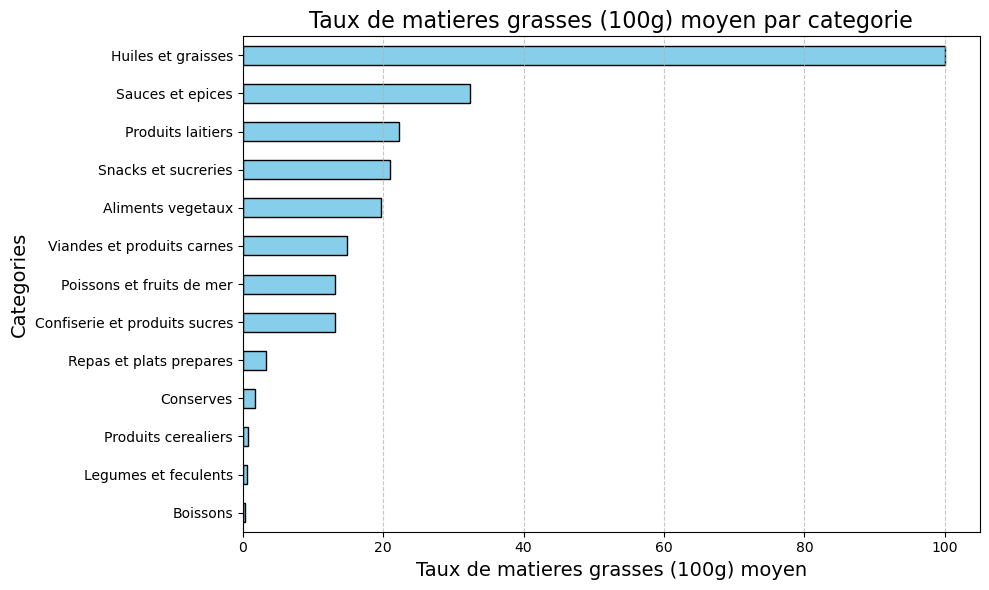

In [12]:
stats.moy_par_categorie('Taux de matieres grasses (100g)')

On s'intéresse ensuite aux données en elles-mêmes : est-ce qu'il y a beaucoup de *NA* ou non ?

In [13]:
na_par_variable = data.apply(lambda x: x.isna().sum()).sort_values(ascending=False)
print(na_par_variable)
print('-'*60)
print(f"Nombre total d'obsevations {len(data)}")

Ecoscore                                    78
Taux de sel (100g)                          50
Energie (Kcal) (100g)                       44
Taux de matieres grasses saturees (100g)    38
Taux de sucre (100g)                        36
Taux de matieres grasses (100g)             34
Taux de proteine (100g)                     32
Categorie_clean                              5
Nom                                          4
Nutriscore                                   0
dtype: int64
------------------------------------------------------------
Nombre total d'obsevations 483


On constate que certaines variables, comme l’Ecoscore, présentent un nombre important de valeurs manquantes (78 sur 482 observations).

c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris\src\services\stats.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=filtered_df['Categorie_clean'], y=filtered_df[variable], palette="Set3")


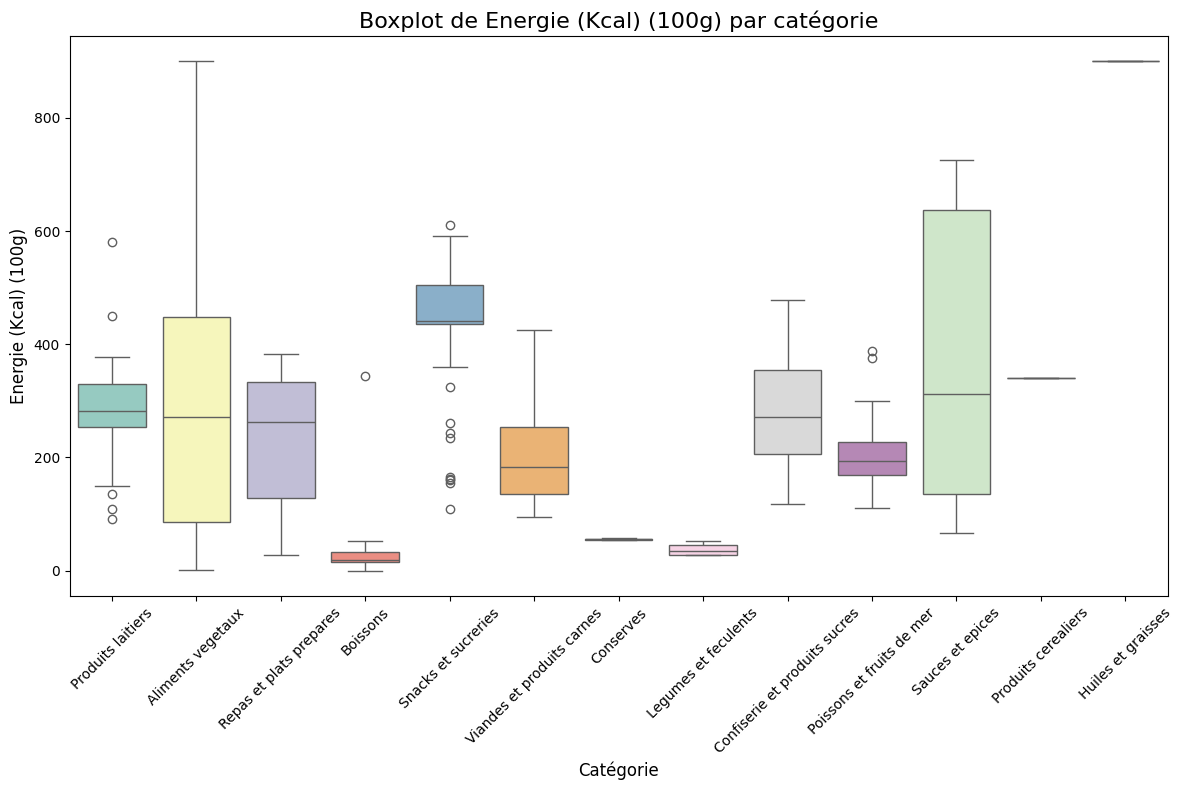

In [10]:
stats.boxplot_categorie("Energie (Kcal) (100g)")

Cela explique le fait qu'il y ait des boxplots plats. On peut donc réappliquer la méthode avec cette fois-ci l'atribut *'few_obs'* qui nous permet de rentrer le nombre minimal d'observations à avoir dans une catégorie pour réaliser le boxplot.

On ne va garder que les catégories qui contiennent au moins 5 observations.

c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris\src\services\stats.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=filtered_df['Categorie_clean'], y=filtered_df[variable], palette="Set3")


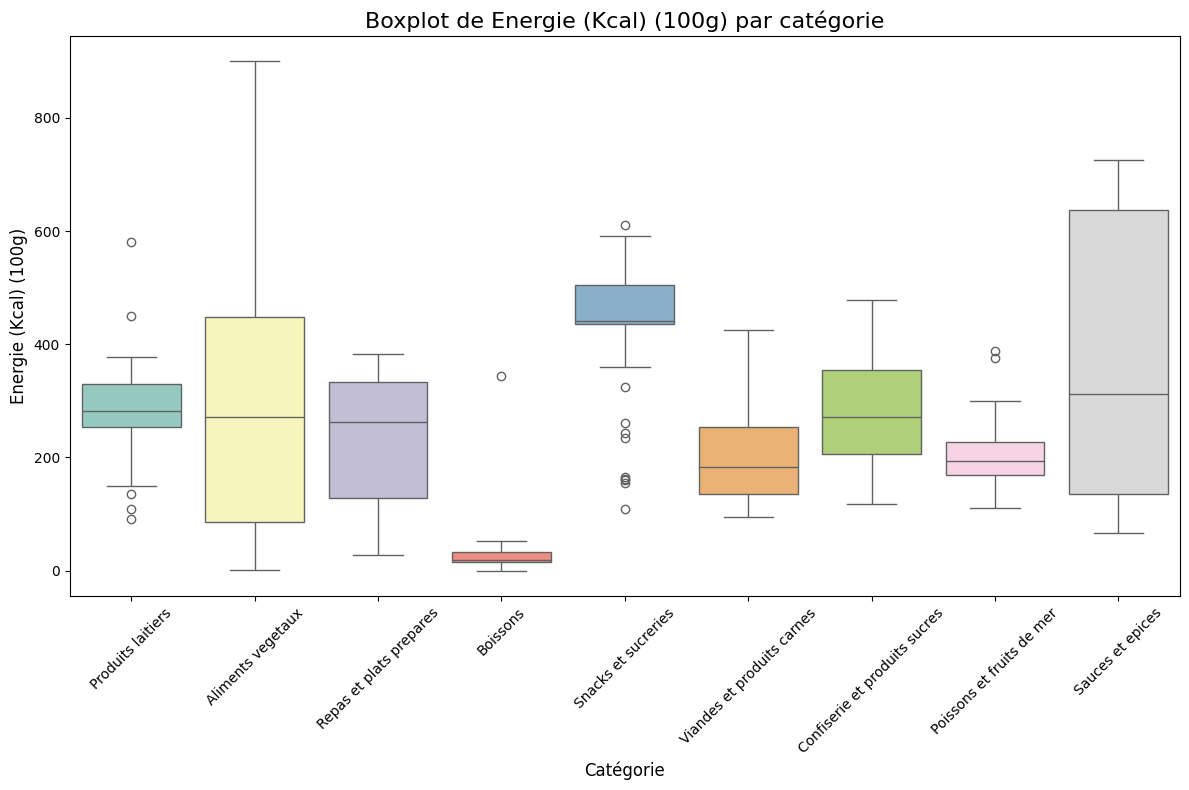

In [11]:
stats.boxplot_categorie("Energie (Kcal) (100g)", 5)

Qu'en est-il pour les données catégorielles ?

Nom                                          object
Nutriscore                                   object
Ecoscore                                    float64
Taux de sel (100g)                          float64
Taux de matieres grasses (100g)             float64
Taux de matieres grasses saturees (100g)    float64
Taux de proteine (100g)                     float64
Taux de sucre (100g)                        float64
Energie (Kcal) (100g)                       float64
Categorie_clean                              object
dtype: object


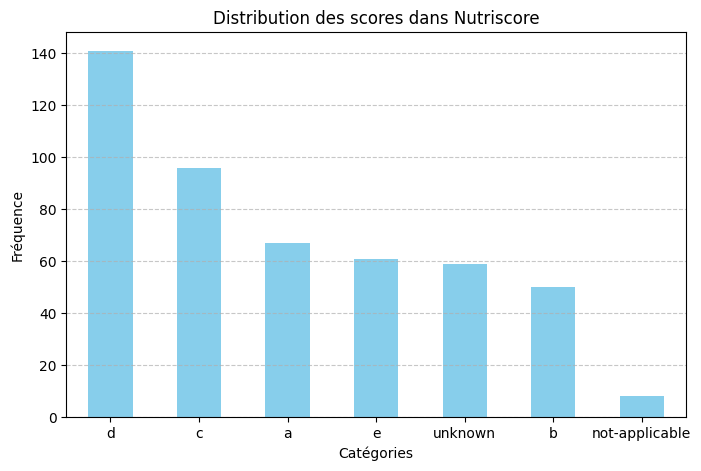

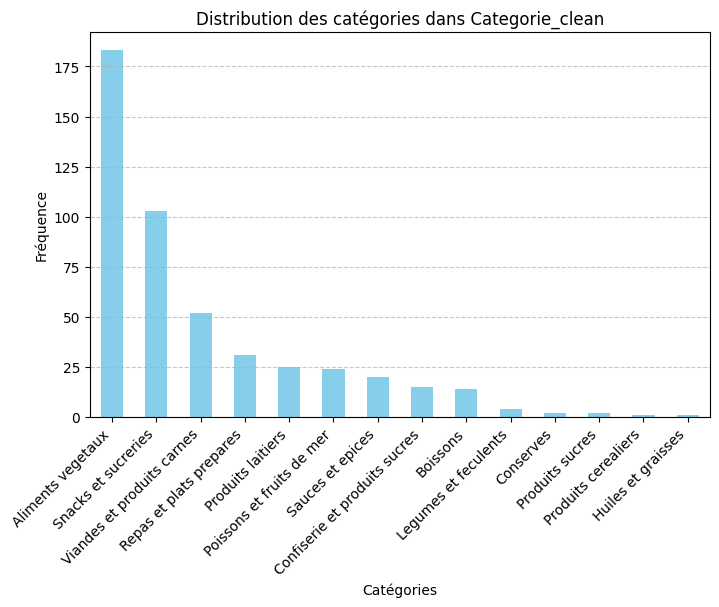

In [12]:
print(data.dtypes)
# Compter les occurrences de chaque catégorie
counts_nutriscore = data['Nutriscore'].value_counts()
counts_Categorie_clean = data['Categorie_clean'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(8, 5))
counts_nutriscore.plot(kind='bar', color='skyblue')
plt.title('Distribution des scores dans Nutriscore')
plt.xlabel('Catégories')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Créer un graphique en barres
plt.figure(figsize=(8, 5))
counts_Categorie_clean.plot(kind='bar', color='skyblue')
plt.title('Distribution des catégories dans Categorie_clean')
plt.xlabel('Catégories')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### b) Statistiques descriptives multivariées

On souhaite désormais s'intéresser à la covariance entre les variables deux à deux. On peut pour ce faire regarder la matrice des covariances.

In [ ]:
# stats.stats_covariances()


TODO -> commenter

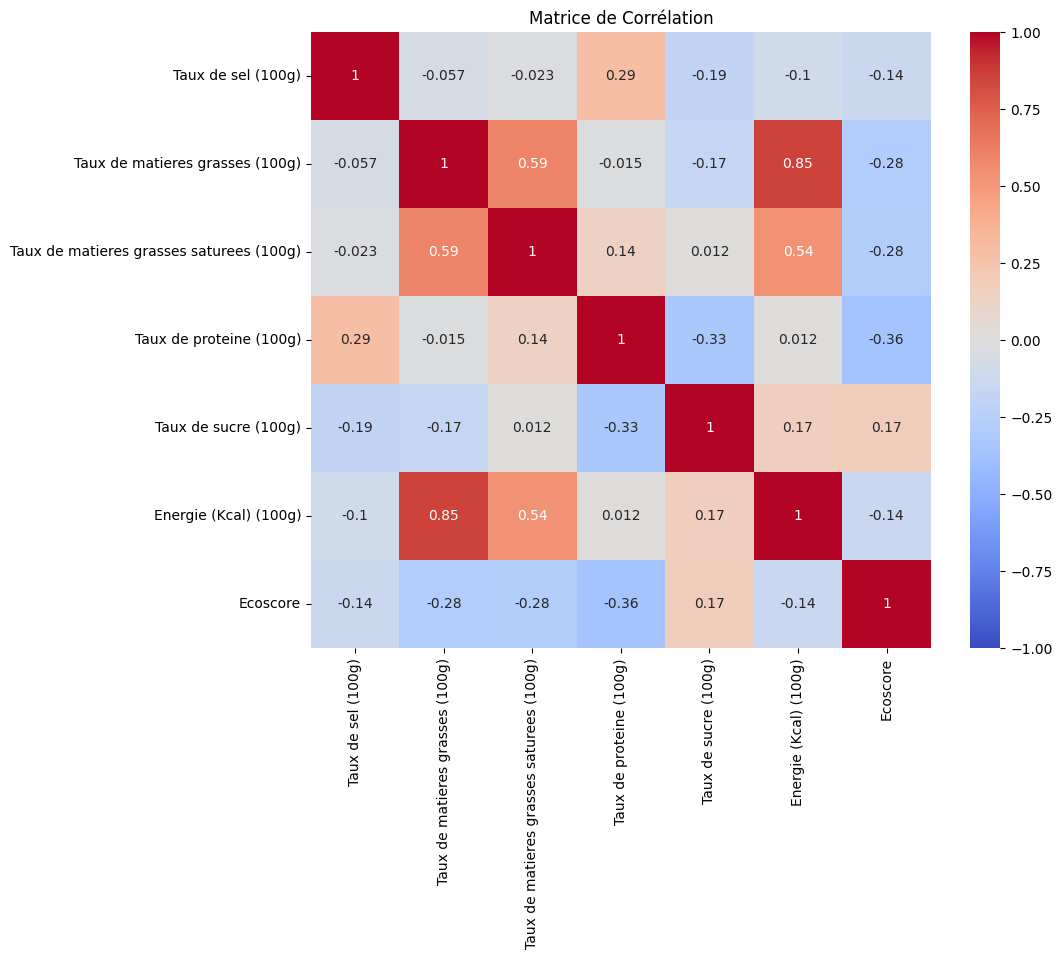

In [14]:
stats.corr_matrix()

**Taux de matières grasses et Energie (Kcal) :**

La corrélation entre le « Taux de matières grasses (100g) » et l’« Energie (Kcal) (100g) » est très élevée et positive (valeur ~0.85). Cela signifie que plus un produit est gras, plus il a tendance à être calorique. Cette relation est cohérente d’un point de vue nutritionnel, les lipides étant la source la plus concentrée en calories.

**Taux de matières grasses saturées et Energie (Kcal) :**

Le « Taux de matières grasses saturées (100g) » est également positivement corrélé avec l’énergie (~0.54). C’est une relation moins forte que le taux global de matières grasses, mais montre tout de même qu’un produit riche en graisses saturées est généralement plus calorique.

**Taux de sucre (100g) :**

Le « Taux de sucre (100g) » a une corrélation négative avec le « Taux de proteine (100g) » et une faible corrélation avec la plupart des autres variables. Cela indique que les produits très sucrés ne sont pas nécessairement ceux les plus gras, salés ou protéinés. Le sucre semble être relativement indépendant des autres macronutriments, ce qui reflète la diversité des produits sucrés (fruits, confiseries, boissons) qui n’ont pas tous les mêmes profils nutritionnels.

**Ecoscore :**

L’« Ecoscore » présente des corrélations relativement faibles avec les autres variables (autour de -0.14 à -0.36). La corrélation négative la plus marquée est entre l’Ecoscore et le « Taux de proteine (100g) » (~-0.36). Cela pourrait suggérer que les produits plus riches en protéines ne sont pas forcément les plus vertueux sur le plan environnemental, ou inversement, que les produits avec un meilleur Ecoscore sont souvent moins riches en protéines. Cette relation reste toutefois modérée et n’est pas suffisante pour établir une causalité. De manière générale, l’Ecoscore dépend de critères plus complexes (emballage, origine, production), moins directement liés aux seuls macronutriments.

**Taux de sel (100g) :**

Le « Taux de sel (100g) » est positivement corrélé au taux de protéine et faiblement négativement corrélé à l’Ecoscore. Les produits plus salés sont souvent transformés ou issus de filières moins durables, ce qui pourrait expliquer cette légère corrélation négative avec l’Ecoscore, même si elle reste faible.

**En résumé**, les relations les plus notables se trouvent entre les matières grasses (y compris saturées) et l’énergie, ce qui est cohérent avec la densité calorique des lipides. L’Ecoscore ne présente pas de fortes corrélations directes avec ces variables nutritionnelles, suggérant que la performance environnementale d’un produit n’est pas simplement liée à sa composition nutritionnelle. Les autres relations sont plus nuancées et montrent une certaine indépendance entre sucre, protéines, sel et Ecoscore, indiquant que les produits alimentaires couvrent une large diversité de profils nutritionnels et environnementaux.

## 3- Mise à jour BDD

Cette section se place ici afin de ne pas modifier les statistiques descriptives faites ci-dessus. Les statistiques précédentes ont été calculées sur les données qui ont servi à initialiser la base de données. Pour que l'interprétation en lien avec chaque graphique reste cohérente, il faut évidemment que les données soient les mêmes à chaque fois. Nous pourrions refaire la totalité du travail à chaque fois que l'on met à jour la BDD mais cela n'aurait pas trop de sens dans le contexte de ce projet.

Nous souhaitions tout de même inclure l'option de mettre à jour la base de données. En effet, nous pouvons chercher un code barre dans la base de données, si celui-ci n'est pas déjà présent, alors nous faisons une requête API pour l'ajouter à la BDD.

### a) Navigation dans la BDD

Commençons par rechercher un barcode qui appartient déjà à la BDD. On n'a ainsi pas besoin de requêter l'API car on peut directement requêter la BDD.

In [15]:
bar = Barcodes()
data = bar.df
barcode = '3229820789118'
print(bar.get_produit(barcode))



L'url associée au barcode est : https://world.openfoodfacts.org/api/v0/product/3229820789118.json
Ce produit associé au code barre 3229820789118                   vient d'être ajouté à la BDD
Nom                                                                      Lunettes fraise
Categorie                                                        fr:lunettes-a-la-fraise
Nutriscore                                                                             d
Novascore                                   en:4-ultra-processed-food-and-drink-products
Ecoscore                                                                            83.0
Taux de sel (100g)                                                                   0.1
Taux de matieres grasses (100g)                                                     15.0
Taux de matieres grasses saturees (100g)                                             4.6
Taux de proteine (100g)                                                              6.0
Taux de

Le produit correspondant au code-barres spécifié a été trouvé dans la BDD. Si c’était la première fois qu’on recherchait ce code-barres, le produit a été ajouté après requête à l’API Open Food Facts, enrichissant ainsi la base de données. On observe le nom du produit (‘Lunettes fraise’), sa catégorie spécifique, son Nutriscore (‘d’), et des informations nutritionnelles. Cela confirme la flexibilité et la mise à jour dynamique de notre base. 

### b) Suppression de données

Supprimons le code-barre que l'on vient de chercher.

In [16]:
# bar.delete_produit(barcode)
print(f"Nombre d'observation avant la suppression : {len(data)}")
bar.delete_produit(barcode)
print(f"Nombre d'observation après la suppression : {len(data)}")

Nombre d'observation avant la suppression : 483
Suppression de 3229820789118 confirmée.
Nombre d'observation après la suppression : 482


Après suppression, une observation a disparu du dataset, ce qui illustre la capacité de modifier dynamiquement la base de données. Ce nettoyage sélectif peut être utile si certains produits sont mal renseignés, obsolètes ou non pertinents pour une analyse.

### c) Ajout de nouvelles données

Ré-ajoutons maintenant la donnée que l'on vient de supprimer.

In [17]:
# bar.delete_produit(barcode)
print(f"Nombre d'observation avant l'ajout : {len(data)}")
bar.get_produit(barcode)
print(f"Nombre d'observation après l'ajout : {len(data)}")

Nombre d'observation avant l'ajout : 482
L'url associée au barcode est : https://world.openfoodfacts.org/api/v0/product/3229820789118.json
Ce produit associé au code barre 3229820789118                   vient d'être ajouté à la BDD
Nombre d'observation après l'ajout : 483


Le ré-ajout du même code-barres montre la souplesse du système à interagir avec l’API et la BDD. Cela permet de maintenir la base à jour, d’ajouter de nouveaux produits ou de restaurer ceux supprimés, garantissant un dataset évolutif et adapté aux besoins de l’analyse. 

### d) suppression de la BDD

Le code suivant est commenté pour éviter que vous supprimiez la base de données en faisant tourner le code. Vous pouvez le décommenter pour vérifier que cela supprimer bien la base de données.

In [18]:
# bar.vider_database()
# print(bar.df)
# print(bar.df.empty)

## 4- Modèle prédictifs

Après avoir bien cerné la nature des données, leur qualité et leurs limites, une étape importante consiste à envisager des méthodes prédictives. L’objectif principal que nous nous fixons est de tenter de prédire le Nutriscore d’un produit à partir de ses caractéristiques nutritionnelles. Le Nutriscore, indicateur devenu populaire pour guider le consommateur dans ses choix, résulte souvent d’une formule complexe prenant en compte le taux de sucre, de sel, de protéines, de fibres, de graisses saturées, etc.
Grâce aux informations disponibles (variables nutritionnelles, catégories, etc.), nous allons chercher à construire un modèle de classification supervisée.

### a) Modèle 1

In [19]:
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

On peut faire une régression logistique car (???). Commençons par rappeler les variables dont nous disposons :

On crée une instance et on applique le modèle de régression logistique.

In [20]:
# Assurez-vous que le fichier 'Traitement' et le DataFrame 'df' sont bien chargés
from src.services.traitement import Traitement
from src.services.prediction_rl import LogisticRegressionPrediction

# Chargement du DataFrame
df = Traitement().df

# Vérification que le DataFrame n'est pas vide
if df.empty:
    raise ValueError("Le DataFrame est vide, veuillez vérifier le chargement des données.")

# Création de l'objet de prédiction pour la régression logistique
log_pred = LogisticRegressionPrediction()

# Entraînement du modèle
log_pred.train_model()

# Évaluation des performances
log_pred.evaluate_performance()

# Affichage des coefficients
log_pred.get_model_details()


Matrice de confusion :
 [[10  0  2  1  0  0  0]
 [ 5  1  2  2  0  0  0]
 [ 2  0  9  5  1  0  2]
 [ 0  0  3 20  2  0  4]
 [ 0  0  0  7  5  0  0]
 [ 1  0  0  1  0  0  0]
 [ 3  2  1  3  1  0  2]]
------------------------------------------------------------
Rapport de classification
              precision    recall  f1-score   support

           0       0.48      0.77      0.59        13
           1       0.33      0.10      0.15        10
           2       0.53      0.47      0.50        19
           3       0.51      0.69      0.59        29
           4       0.56      0.42      0.48        12
           5       0.00      0.00      0.00         2
           6       0.25      0.17      0.20        12

    accuracy                           0.48        97
   macro avg       0.38      0.37      0.36        97
weighted avg       0.45      0.48      0.45        97

------------------------------------------------------------
Précision : 48.45%
Coefficients :
 [[ 3.50168278e-01 -2.125449

Évaluation des performances du modèle.

Affichage des coefficients du modèle.

Affichage des probabilités prédites. (A voir si on laisse).

Prédictions pour une nouvelle donnée.

In [21]:
# Exemple d'entraînement avec régression logistique
import pandas as pd
logistic_model = LogisticRegressionPrediction()
logistic_model.train_model()

# Prédiction sur de nouvelles données
new_data = pd.DataFrame({
    'Ecoscore': [7],
    'Taux de sel (100g)': [0.4],
    'Taux de matieres grasses (100g)': [3.2],
    'Taux de matieres grasses saturees (100g)': [1.2],
    'Taux de proteine (100g)': [6.1],
    'Taux de sucre (100g)': [12.0],
    'Energie (Kcal) (100g)': [240]
})

predictions = logistic_model.predict_nutriscore(new_data)
print(predictions)


d


### b) Modèle 2

In [22]:
# Assurez-vous que le fichier 'Traitement' et le DataFrame 'df' sont bien chargés
from src.services.traitement import Traitement
from src.services.prediction_rf import RandomForestPrediction

# Chargement du DataFrame
df = Traitement().df

# Vérification que le DataFrame n'est pas vide
if df.empty:
    raise ValueError("Le DataFrame est vide, veuillez vérifier le chargement des données.")

# Création de l'objet de prédiction pour la Random Forest
rf_pred = RandomForestPrediction()

# Entraînement du modèle
rf_pred.train_model(n_estimators=200, max_depth=10)  # Personnalisez les hyperparamètres si nécessaire

# Évaluation des performances
rf_pred.evaluate_performance()

# Affichage des importances des caractéristiques
rf_pred.get_model_details()


Matrice de confusion :
 [[10  2  0  0  0  0  1]
 [ 1  4  3  1  0  1  0]
 [ 2  2 11  2  1  1  0]
 [ 0  0  2 19  2  0  6]
 [ 0  0  0  3  9  0  0]
 [ 1  0  0  1  0  0  0]
 [ 2  0  4  3  0  0  3]]
------------------------------------------------------------
Rapport de classification
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.50      0.40      0.44        10
           2       0.55      0.58      0.56        19
           3       0.66      0.66      0.66        29
           4       0.75      0.75      0.75        12
           5       0.00      0.00      0.00         2
           6       0.30      0.25      0.27        12

    accuracy                           0.58        97
   macro avg       0.48      0.49      0.48        97
weighted avg       0.57      0.58      0.57        97

------------------------------------------------------------
Précision : 57.73%
Importances des caractéristiques :
 [0.1167

## Conclusion :


En s’appuyant sur Open Food Facts, ce projet entend participer à une meilleure compréhension de notre alimentation. La richesse des données disponibles, combinée à l’analyse statistique, à la visualisation, et à la modélisation prédictive, permettra de mettre en évidence les facteurs qui influencent la qualité nutritionnelle des produits. Bien que la problématique initiale reste volontairement large (« découvrir davantage notre alimentation »), le projet s’affine progressivement vers la prédiction du Nutriscore, démontrant ainsi l’intérêt pratique de l’exploitation de données ouvertes dans le domaine agroalimentaire.